# AI_Tupro2
Kaenova Mahendra Auditama<sup>1</sup><br>
Adhe Akram Azhari<sup>2</sup><br>
Elita Aurora Az Zahra<sup>3</sup><br>
<sup>1</sup><a href="kaenova@student.telkomuniversity.ac.id">kaenova@student.telkomuniversity.ac.id</a><br>
<sup>2</sup><a href="adheakramazhari@student.telkomuniversity.ac.id">adheakramazhari@student.telkomuniversity.ac.id</a><br>
<sup>3</sup><a href="elitaaurora@student.telkomuniversity.ac.id">elitaaurora@student.telkomuniversity.ac.id</a><br>
Informatics Engineering, Telkom University, Indonesia<br>
2021

Proyek ini merupakan proyek kedua dari Mata Kuliah Pengantar Kecerdasan Buatan dari 3 proyek yang akan di buat. Proyek kedua ini mengimplementasikan teknik reasoning dalam Kecerdasan Buatan dengan Fuzzy Logic. Pada tugas ini, kami diminta untuk membuat suatu algoritma dimana akan memeringkatkan 10 restoran terbaik dari 100 restoran berdasarkan penilaian makanan dan pelayanan dari restoran tersebut. Dengan data-data tersebut kami diminta untuk menerapkan algoritma Fuzzy Logic.

# Import Libararies and Data

Disini kami menggunakan <b>pandas</b> untuk input/output dari data yang diminta, selain itu juga kami membutuhkan <b>matplotlib.pyplot</b> untuk membuat gambar fungsi keanggotaan. Kami menggunakan fungsi read_excel() untuk memasukkan data dari tugas kami dan memasukkannya ke dalam kelas restoran yang telah kami buat.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('../data/raw/restoran.xlsx')
df.head()

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4


In [2]:
class restoran:
    def __init__(self):
        self.id_restoran = 0
        self.pelayanan = 0
        self.makanan = 0
        
        # Fuzzifikasi (Fuzzy Input)
        self.makanan_enak = -1          # Range [7, 10]
        self.makanan_tidakenak = -1     # Range [1, 4]
        
        self.pelayanan_baik = -1        # Range [90, 100]
        self.pelayanan_biasa = -1       # Range [40, 60]
        self.pelayanan_jelek = -1       # Range [1, 20]
        
        # Inferensi (Fuzzy Output)
        self.bagus = []                 # Masukkan Semua Nilai Yang Mungkin untuk Bagus
        self.buruk = []                 # Masukkan Semua Nilai Yang Mungkin untuk Buruk
        self.bagus_akhir = 0            # Nilai Terkecil dari list Bagus
        self.buruk_akhir = 0            # Nilai Terkecil dari list Buruk
        
        # Defuzzifikasi (Crisp Input)
        self.nilai_akhir = 0
        
    def tampilData(self):
        print('id restoran: {} \n nilai pelayanan: {} \n nilai makanan: {} \n nilai akhir: {} \n   makanan_enak: {} \n   makanan_tidakenak: {} \n   pelayanan_baik: {} \n   pelayanan_biasa: {} \n   pelayanan_jelek: {} \n   persentase bagus: {} \n   persentase buruk: {}'.format(self.id_restoran, self.pelayanan, self.makanan, self.nilai_akhir, self.makanan_enak, self.makanan_tidakenak, self.pelayanan_baik, self.pelayanan_biasa, self.pelayanan_jelek, self.bagus_akhir, self.buruk_akhir))

        
restoran_data  = []

#Masukkan data dari dataframe ke dalam list restoran data
for i in range(len(df)):
    restoran_temp = restoran()
    restoran_temp.id_restoran = df.iloc[i][0]
    restoran_temp.pelayanan = df.iloc[i][1]
    restoran_temp.makanan = df.iloc[i][2]
    restoran_data.append(restoran_temp)

# Pengklasifikasian Crisp Input dan nilai μ serta melakukan Fuzzifikasi
Kualitas pelayanan dapat dibagi menjadi
- Baik  
- Biasa  
- Jelek   

Kualitas Makanan
- Enak  
- Tidak Enak  
Dimana kedua hal tersebut memiliki Fungsi Keanggotaan yang sama yaitu trapesium.  
Dengan nilai crisp tersebut kami membuat gambaran nilai μ yang akan kami buat seperti pada gambar di bawah:  

Sehingga akan menghailkan nilai hasil dari fuzzifikasi (fuzzi input)

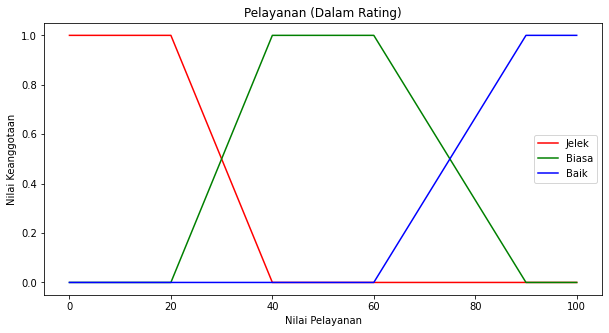

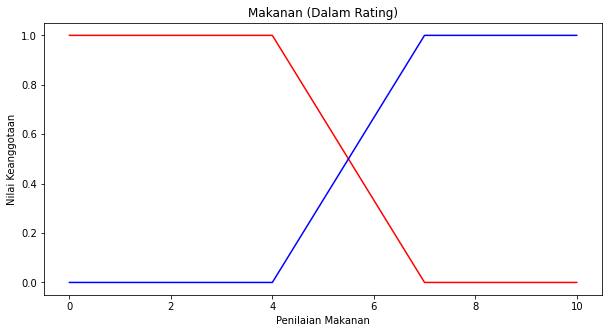

In [3]:
def GambarPelayanan():
    x1 = [0,20,40,100] 
    y1 = [1,1,0,0] 
    
    x2 = [0,20,40,60,90,100] 
    y2 = [0,0,1,1,0,0]
    
    x3 = [0,60,90,100] 
    y3 = [0,0,1,1]
    
    plt.figure(figsize=(10,5))
    plt.plot(x1, y1,'r-',label = 'Jelek') 
    plt.plot(x2, y2,'g-',label = 'Biasa') 
    plt.plot(x3, y3,'b-',label = 'Baik')
    plt.xlabel('Nilai Pelayanan')
    plt.ylabel('Nilai Keanggotaan')
    plt.title('Pelayanan (Dalam Rating)') 
    plt.legend()
    plt.savefig('../reports/figures/fungsi_keanggotaan_pelayanan.jpg', format='jpg', dpi=300)
    plt.show()
    
def GambarMakanan():
    x1 = [0,4,7,10] 
    y1 = [1,1,0,0] 
    
    x2 = [0,4,7,10] 
    y2 = [0,0,1,1] 
    
    fig = plt.figure(figsize=(10,5))
    plt.plot(x1, y1,'r-',label = 'Tidak Enak') 
    plt.plot(x2, y2,'b-',label = 'Enak')
    plt.xlabel('Penilaian Makanan')
    plt.ylabel('Nilai Keanggotaan')
    plt.title('Makanan (Dalam Rating)') 
    plt.savefig('../reports/figures/fungsi_keanggotaan_makanan.jpg', format='jpg', dpi=300)
    plt.show()
    
    
GambarPelayanan()
GambarMakanan()

In [4]:
def fuzzifikasi(restoran_temp):
    for i in range (len(restoran_temp)):
        # Perhitungan pelayanan
        if restoran_temp[i].pelayanan >= 1 and restoran_temp[i].pelayanan <= 20:
            restoran_temp[i].pelayanan_jelek = 1
        elif restoran_temp[i].pelayanan > 20 and restoran_temp[i].pelayanan < 40:
            restoran_temp[i].pelayanan_jelek = -(restoran_temp[i].pelayanan - 40)/(40 - 20)
            restoran_temp[i].pelayanan_biasa = (restoran_temp[i].pelayanan - 20)/(40 - 20)
        elif restoran_temp[i].pelayanan >= 40 and restoran_temp[i].pelayanan <= 60:
            restoran_temp[i].pelayanan_biasa = 1
        elif restoran_temp[i].pelayanan > 60 and restoran_temp[i].pelayanan < 90:
            restoran_temp[i].pelayanan_biasa = -(restoran_temp[i].pelayanan - 90)/(90 - 60)
            restoran_temp[i].pelayanan_baik = (restoran_temp[i].pelayanan - 60)/(90 - 60)
        elif restoran_temp[i].pelayanan >= 90 and restoran_temp[i].pelayanan <= 100:
            restoran_temp[i].pelayanan_baik = 1

        if restoran_temp[i].makanan >= 1 and restoran_temp[i].makanan <= 4:
            restoran_temp[i].makanan_tidakenak = 1
        elif restoran_temp[i].makanan > 4 and restoran_temp[i].makanan < 7:
            restoran_temp[i].makanan_tidakenak = -(restoran_temp[i].makanan - 7)/(7 - 4)
            restoran_temp[i].makanan_enak = (restoran_temp[i].makanan - 4)/(7 - 4)
        elif restoran_temp[i].makanan >= 7 and restoran_temp[i].makanan <= 10:
            restoran_temp[i].makanan_enak = 1
            
    return restoran_temp 

# Melakukan Fuzzifikasi terhadap restoran_data
restoran_data = fuzzifikasi(restoran_data)

# Inferensi
Untuk menghasilkan fuzzy output, kita harus melakukan terlebih dahulu Inferensi berdasarkan aturan-aturan yang sudah di atur.
Aturan tersebut dapat dilihat seperti di bawah:  

| Makanan \ Pelayanan | Jelek | Biasa | Baik  |
|-------------------|-------|-------|-------|
| Tidak Enak        | Buruk | Buruk | Buruk |
| Enak              | Buruk | Bagus | Bagus | 

In [5]:
def inferensi(restoran_temp):
    for i in range  (len(restoran_temp)):
      if restoran_temp[i].makanan_tidakenak != -1:
          if restoran_temp[i].pelayanan_jelek != -1:
              restoran_temp[i].buruk.append(min(restoran_temp[i].makanan_tidakenak,restoran_temp[i].pelayanan_jelek))
          if restoran_temp[i].pelayanan_biasa != -1:
              restoran_temp[i].buruk.append(min(restoran_temp[i].makanan_tidakenak,restoran_temp[i].pelayanan_biasa))
          if restoran_temp[i].pelayanan_baik != -1:
              restoran_temp[i].buruk.append(min(restoran_temp[i].makanan_tidakenak, restoran_temp[i].pelayanan_baik))
      if restoran_temp[i].makanan_enak != -1:
          if restoran_temp[i].pelayanan_jelek != -1:
              restoran_temp[i].buruk.append(min(restoran_temp[i].makanan_enak,restoran_temp[i].pelayanan_jelek))
          if restoran_temp[i].pelayanan_biasa != -1:
              restoran_temp[i].bagus.append(min(restoran_temp[i].makanan_enak,restoran_temp[i].pelayanan_biasa))
          if restoran_temp[i].pelayanan_baik != -1:
              restoran_temp[i].bagus.append(min(restoran_temp[i].makanan_enak, restoran_temp[i].pelayanan_baik))
      
      if len(restoran_temp[i].bagus) != 0:
          restoran_temp[i].bagus_akhir = max(restoran_temp[i].bagus)
          
      if len(restoran_temp[i].buruk) != 0:
          restoran_temp[i].buruk_akhir = max(restoran_temp[i].buruk)
      
    return restoran_temp

# Melakukan inferensi terhadap restoran_data
restoran_data = inferensi(restoran_data)

# Defuzzifikasi
Berdasrkan nilai yang didapat dari nilai inferensi sebelumnya, kita harus melakukan defuzzifikasi sehingga mendaptkan nilai yang diinginkan.  
Dengan berdasarkan μ output, kita mendapatkan nilai bilangan real dari 1 hingga 100.  

Penilaian Restoran
- Bagus
- Buruk

Dengan gambar fungsi keanggotaan seperit berikut:  

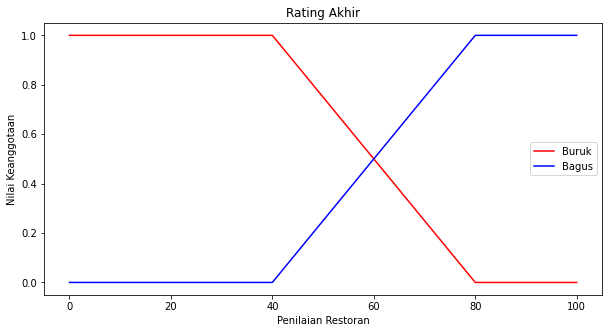

In [6]:
def GambarNilaiAkhir():
    x1 = [0,40,80,100] 
    y1 = [1,1,0,0] 
    
    x2 = [0,40,80,100] 
    y2 = [0,0,1,1] 
    
    plt.figure(figsize=(10,5))
    plt.plot(x1, y1,'r-',label = 'Buruk') 
    plt.plot(x2, y2,'b-',label = 'Bagus')
    plt.xlabel('Penilaian Restoran')
    plt.ylabel('Nilai Keanggotaan')
    plt.title('Rating Akhir') 
    plt.legend()
    plt.savefig('../reports/figures/fungsi_keanggotaan_output.jpg', format='jpg', dpi=300)
    plt.show()
    
    
GambarNilaiAkhir()

In [7]:
def defuzzifikasi(sample: int, rest: restoran) -> restoran:
    #Parameter fungsi keanggotaan output
    parm = {
        "batas_bawah" : 1,
        "buruk_c" : 40,
        "buruk_d" : 80,
        "bagus_a" : 40,
        "bagus_b" : 80,
        "batas_atas": 100
    }
    
    pembilang = 0
    penyebut = 0
    increment = 100 // sample
    for i in (range(sample-0)):
        bilangan = (i+1) * increment
        # print(bilangan)
        if bilangan <= parm['buruk_c']:                    #Pengecekkan jika berada dari titik buruk_c ke bawah
            pembilang += bilangan*rest.buruk_akhir
            penyebut += rest.buruk_akhir
        elif bilangan >= parm['bagus_b']:                  #Pengecekkan jika berada dari titik bagus_b ke atas
            pembilang += bilangan*rest.bagus_akhir
            penyebut += rest.bagus_akhir
        else:                                           #Pengecekkan jika berada di antara / transisi
            nilai_asli_buruk = -(bilangan - parm['buruk_d']) / (parm['buruk_d'] - parm['buruk_c'])
            nilai_asli_bagus = (bilangan - parm['bagus_a']) / (parm['bagus_b'] - parm['bagus_a'])
            
            nilai_terkecil_buruk = min([nilai_asli_buruk, rest.buruk_akhir])
            nilai_terkecil_bagus = min([nilai_asli_bagus, rest.bagus_akhir])
            
            nilai_max = max([nilai_terkecil_buruk, nilai_terkecil_bagus])
            
            pembilang += bilangan*nilai_max
            penyebut += nilai_max

    rest.nilai_akhir = pembilang // penyebut
    
    return rest

# Melakukan defuzzifikasi terhadap data_restoran 
for i in range(len(restoran_data)):
    restoran_data[i] = defuzzifikasi(20, restoran_data[i])

# Ranking dan Output
Berdasarkan nilai-nilai yang didapakan dari defuzzifikasi, kita dapat melakukan rangking untuk 10 besar restoran terbaik

In [8]:
def NilaiAkhirSort(restoran_temp: [restoran()]):
        restoran_temp = sorted(restoran_temp, key=lambda x: x.nilai_akhir, reverse= 1)
        return restoran_temp

# Melakukan sorting terhadap restoran_data
restoran_data = NilaiAkhirSort(restoran_data)

# Memasukkan 10 restoran dengan nilai tertinggi ke dalam list data_akhir
data_akhir = []
for i in range(10):
        data_temp = []
        data_temp.append(restoran_data[i].id_restoran)
        data_temp.append(restoran_data[i].nilai_akhir)
        data_temp.append(restoran_data[i].pelayanan)
        data_temp.append(restoran_data[i].makanan)
        data_akhir.append(data_temp)

# Memasukkan list data_akhir ke dalam dataframe df_akhir
df_akhir = pd.DataFrame(data_akhir, columns=['id', 'nilai_akhir', 'pelayanan', 'makanan'])

# Membuat excel dari dataframe df_akhir
df_akhir.to_excel('../data/processed/peringkat.xls', encoding='xlwt')

df_akhir

<ipython-input-8-a3998520aea5>:22: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_akhir.to_excel('../data/processed/peringkat.xls', encoding='xlwt')


,id,nilai_akhir,pelayanan,makanan
0,1,79.0,58,7
1,6,79.0,59,10
2,7,79.0,61,8
3,20,79.0,49,10
4,24,79.0,100,9
5,25,79.0,61,10
6,27,79.0,59,8
7,39,79.0,52,7
8,42,79.0,94,10
9,51,79.0,48,10
